# Work in Progress

### End-to-end a pretrained/prebuilt ImageNet model from a github repo into `scivision`

Provides an example of end-to-end pipeling from the following test repo as a scivision Model:
https://github.com/quantumjot/scivision-test-plugin
   
The code calls the repo from the catalog and run end-to-end example using ImageNet pretrained/prebuilt models.

## load libraries

In [1]:
from scivision import catalog
from scivision.io import load_pretrained_model

import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.applications.imagenet_utils import decode_predictions

from scivision_test_plugin import ImageNetModel

## query a target entry

In [2]:
my_query = {
    "institution": "alan-turing-institute", 
    "domain": "computer-vision", 
    "task": "object-detection",
    "model": 'https://github.com/quantumjot/scivision-test-plugin'
}

In [3]:
queryR = catalog.query(my_query)

In [4]:
target = queryR[0]

## load model settings and inputs

In [6]:
modelpath = target['model'].replace('https://github.com/','')
scivision_conf = target['scivision_yaml_filename']
inputs = target['datasource']

In [7]:
model = load_pretrained_model(modelpath, SCIVISION_YAML_CONFIG=scivision_conf, allow_install=True)

In [8]:
model = ImageNetModel()

In [9]:
x = imread(inputs)
X = resize(x, (224, 224)) * 255  # cast back to 0-255 range

## prediction and vizualization

In [10]:
y = model.predict(X)

2021-07-28 16:38:08.063680: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


In [11]:
def get_imagenet_label(probs):
    return decode_predictions(probs, top=1)[0][0]

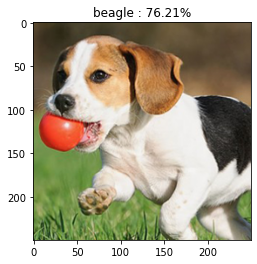

In [12]:
plt.figure()
plt.imshow(x)
_, image_class, class_confidence = get_imagenet_label(y)
plt.title("{} : {:.2f}%".format(image_class, class_confidence * 100))
plt.show()